In [40]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# conda install python-graphviz

In [41]:
!pip install graphviz

In [30]:
import pypyodbc as podbc

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-84AHDEK\ANUJ;"
                     "Database=dtwhpwerbi ;"
                     "Trusted_Connection=yes;")

# running the SQL quey i need
df = pd.read_sql_query('''SELECT * FROM [dbo].[dataset]''', conn2)

# print the shape
print(df.shape)

# Viz
df.head()

D:\Users\Anuj\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(9999, 11)


,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.000000,1,True,True,101348.882812,True
1,608,Spain,Female,41,1,83807.859375,1,False,True,112542.578125,False
2,502,France,Female,42,8,159660.796875,3,True,False,113931.570312,True
3,699,France,Female,39,1,0.000000,2,False,False,93826.632812,False
4,850,Spain,Female,43,2,125510.820312,1,True,True,79084.101562,False


In [71]:
conn2.close()


In [31]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature creditscore :460
The number of values for feature geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature gender :2 -- ['Female' 'Male']
The number of values for feature age :70
The number of values for feature tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature balance :6382
The number of values for feature numofproducts :4 -- [1 2 3 4]
The number of values for feature hascrcard :2 -- [False  True]
The number of values for feature isactivemember :2 -- [False  True]
The number of values for feature estimatedsalary :9999
The number of values for feature exited :2 -- [False  True]


In [32]:
df.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

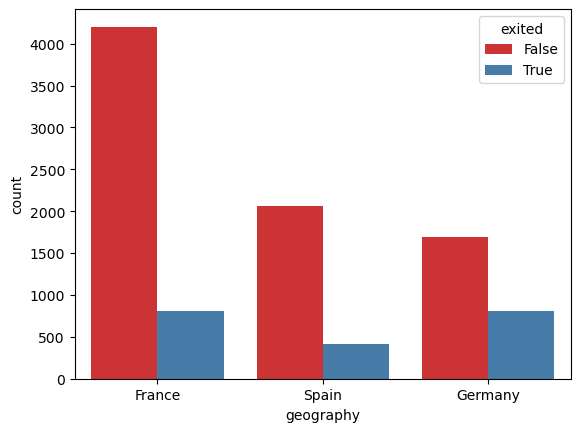

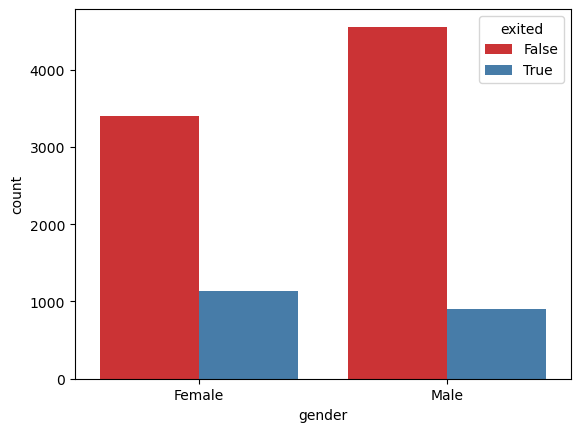

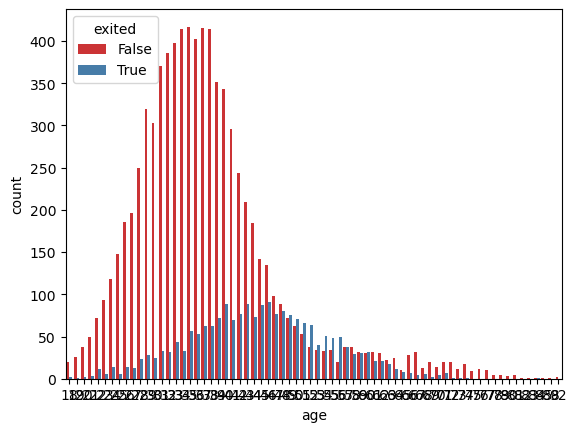

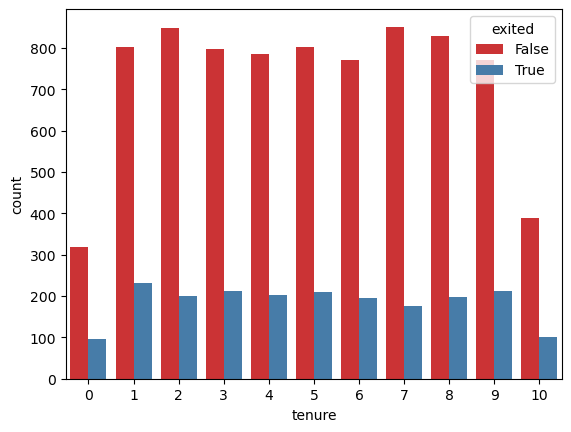

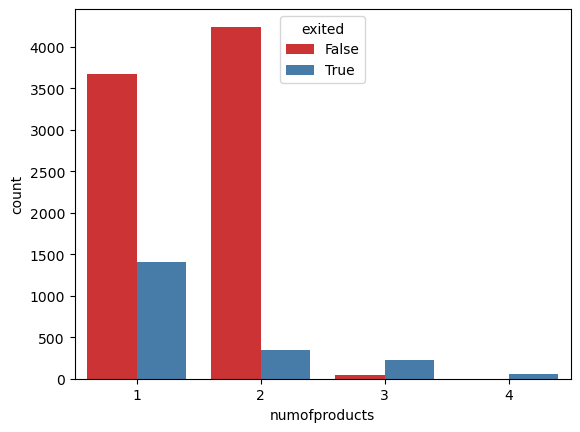

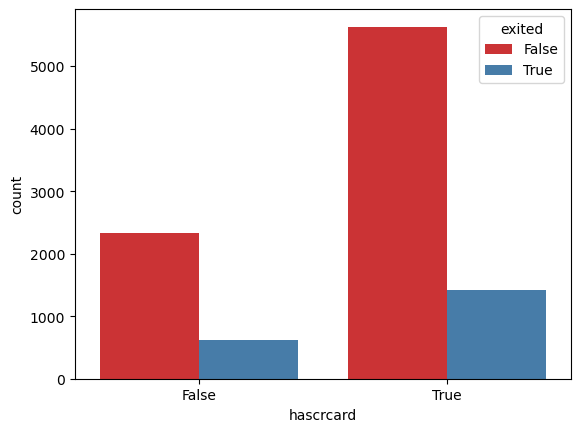

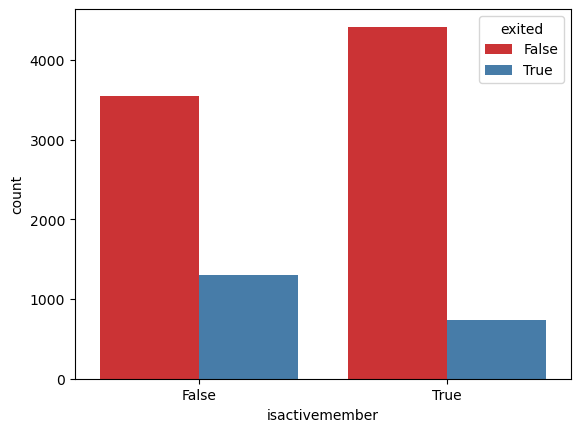

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['geography', 'gender', 'age', 'tenure', 'numofproducts', 'hascrcard',
       'isactivemember']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=df, hue = 'exited', palette="Set1")

In [34]:
df1 = pd.get_dummies(df, columns = ['geography', 'gender', 'hascrcard', 'isactivemember'],drop_first=True)
df1.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male,hascrcard_True,isactivemember_True
0,619,42,2,0.000000,1,101348.882812,True,0,0,0,1,1
1,608,41,1,83807.859375,1,112542.578125,False,0,1,0,0,1
2,502,42,8,159660.796875,3,113931.570312,True,0,0,0,1,0
3,699,39,1,0.000000,2,93826.632812,False,0,0,0,0,0
4,850,43,2,125510.820312,1,79084.101562,False,0,1,0,1,1


In [35]:
df1['balance'].max()

250898.09375

In [36]:
# Scaling our columns
from sklearn.preprocessing import MinMaxScaler
scale_vars = ['creditscore','estimatedsalary','balance','age']
scaler = MinMaxScaler()
df1[scale_vars] = scaler.fit_transform(df1[scale_vars])
df1.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male,hascrcard_True,isactivemember_True
0,0.538,0.324324,2,0.000000,1,0.506735,True,0,0,0,1,1
1,0.516,0.310811,1,0.334031,1,0.562709,False,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,True,0,0,0,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,False,0,0,0,0,0
4,1.000,0.337838,2,0.500246,1,0.395400,False,0,1,0,1,1


In [37]:
# Your code goes here
X = df1.drop('exited', axis=1).values# Input features (attributes)
Y = df1['exited'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

X shape: (9999, 11)
Y shape: (9999,)


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [45]:
for i, column in enumerate(df1.drop('exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature creditscore:, 0.000
Importance of feature age:, 0.636
Importance of feature tenure:, 0.000
Importance of feature balance:, 0.000
Importance of feature numofproducts:, 0.179
Importance of feature estimatedsalary:, 0.000
Importance of feature geography_Germany:, 0.000
Importance of feature geography_Spain:, 0.000
Importance of feature gender_Male:, 0.000
Importance of feature hascrcard_True:, 0.000
Importance of feature isactivemember_True:, 0.186


,index,Variable,Feature Importance Score
0,1,age,0.635706
1,10,isactivemember_True,0.185548
2,4,numofproducts,0.178746
3,0,creditscore,0.000000
4,2,tenure,0.000000
5,3,balance,0.000000
6,5,estimatedsalary,0.000000
7,6,geography_Germany,0.000000
8,7,geography_Spain,0.000000
9,8,gender_Male,0.000000


In [46]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))


Training Accuracy is:  0.8200911212356928
Testing Accuracy is:  0.833


In [47]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

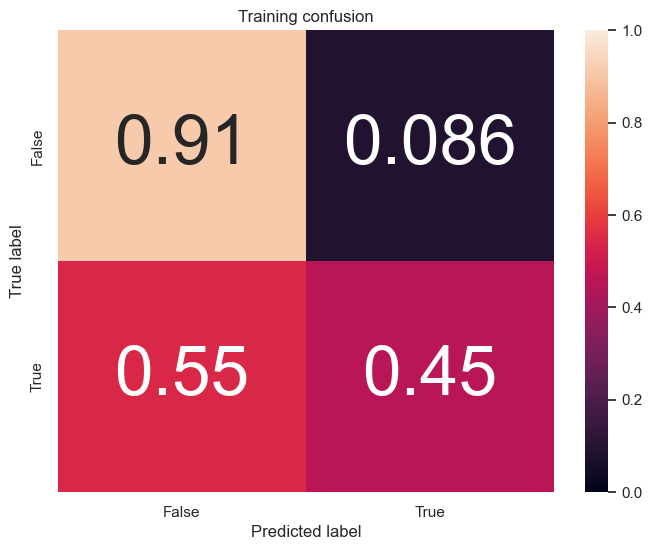

In [48]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [49]:
confusion_matrix(y_train, y_pred)

array([[6545,  617],
       [1002,  835]], dtype=int64)

In [50]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

# Explenations:https://youtu.be/0HDy6n3UD5M

The True Positive rate / Recall per class is:  [0.913851 0.454545]
The Precision per class is:  [0.867232 0.575069]
The False Alarm rate per class is:  [0.545455 0.086149]
The Miss Rate rate per class is:  [0.086149 0.545455]
The Classification error of each class is [0.179909 0.179909]
The Accuracy of each class is [0.820091 0.820091]

The average Recall is:  0.6841981670940063
The average Precision is:  0.721150441621851
The average False Alarm is:  0.31580183290599373
The average Miss Rate rate is:  0.31580183290599373
The average Classification error is 0.17990887876430714
The average Accuracy is 0.8200911212356928


Training Accuracy is:  1.0
Testing Accuracy is:  0.863


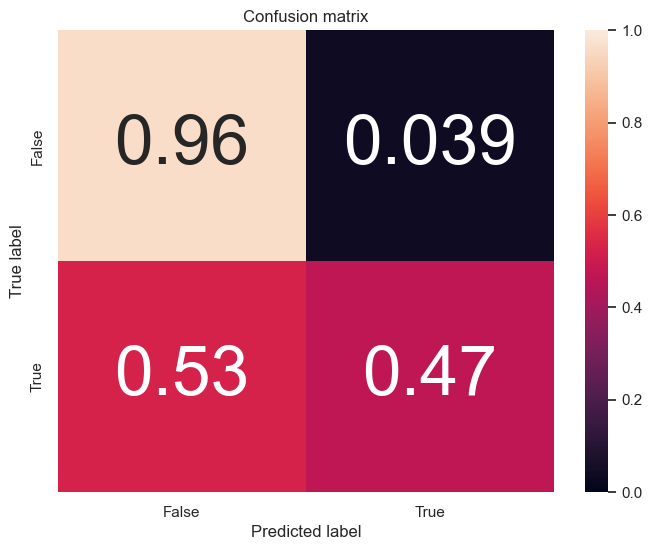

In [51]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)


# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.869
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.800
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.801
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.808
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.820
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.866
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.809
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.826
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.852
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.866
Classification accuracy on test set with max features = log2 and max_depth = None: 0.866
Classification accuracy on test set with max features = log2

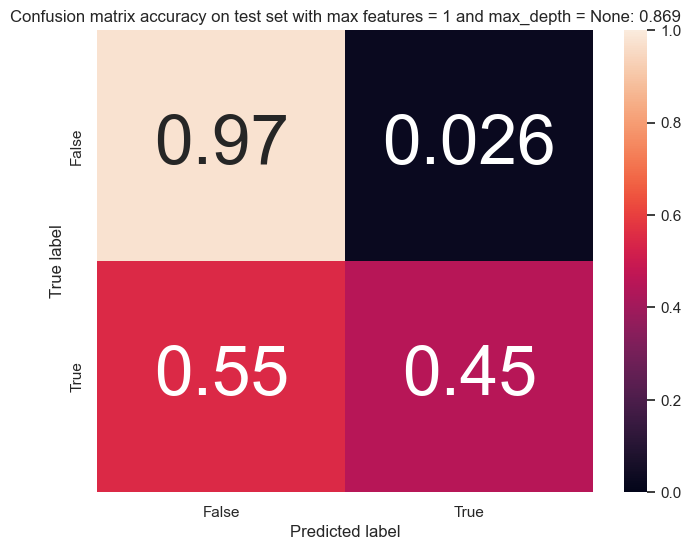

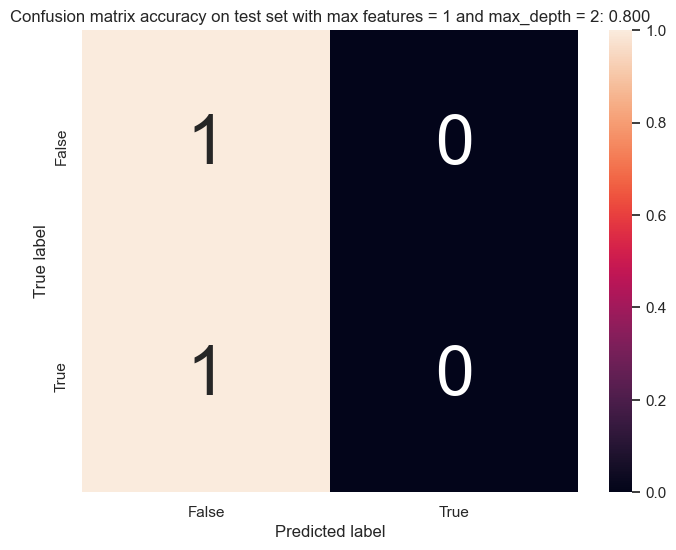

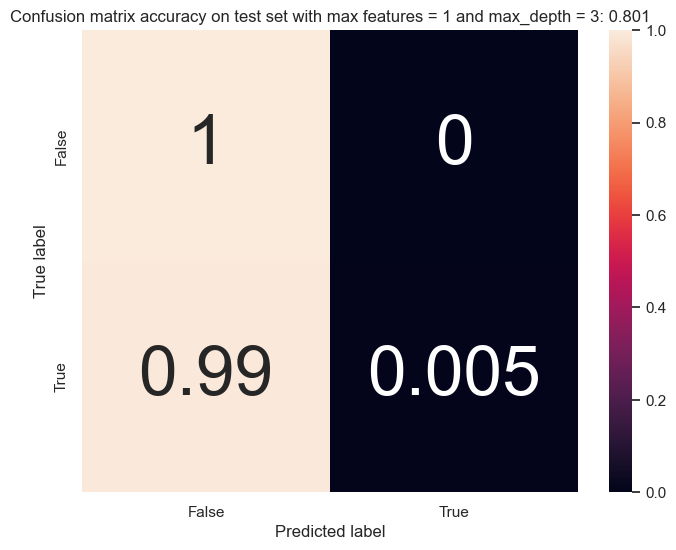

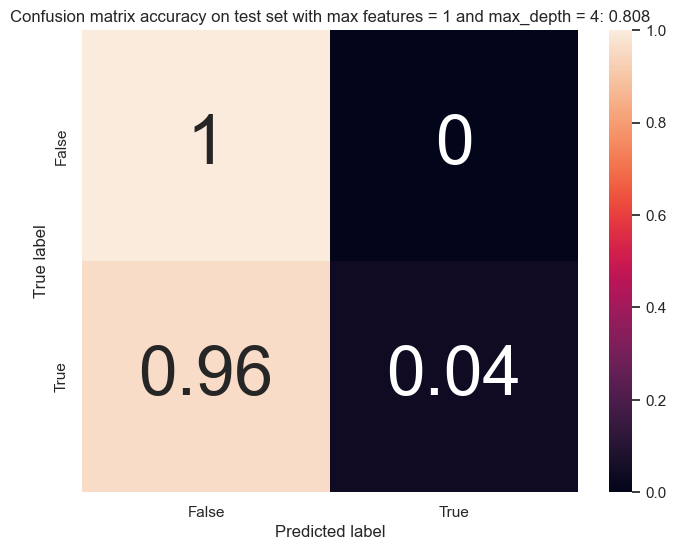

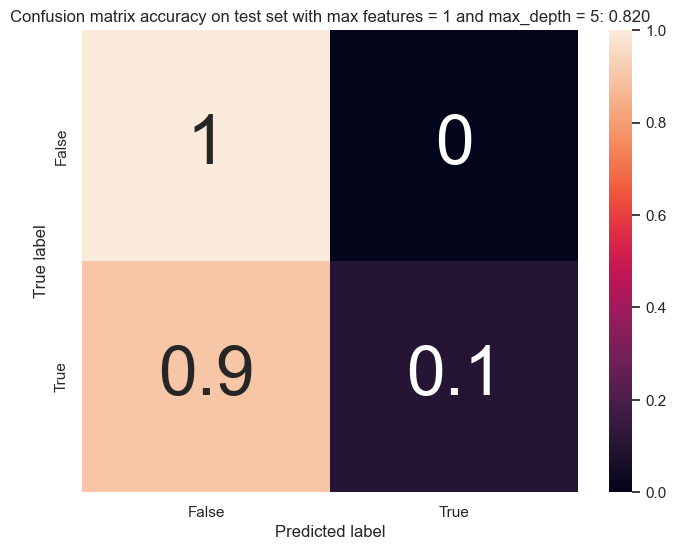

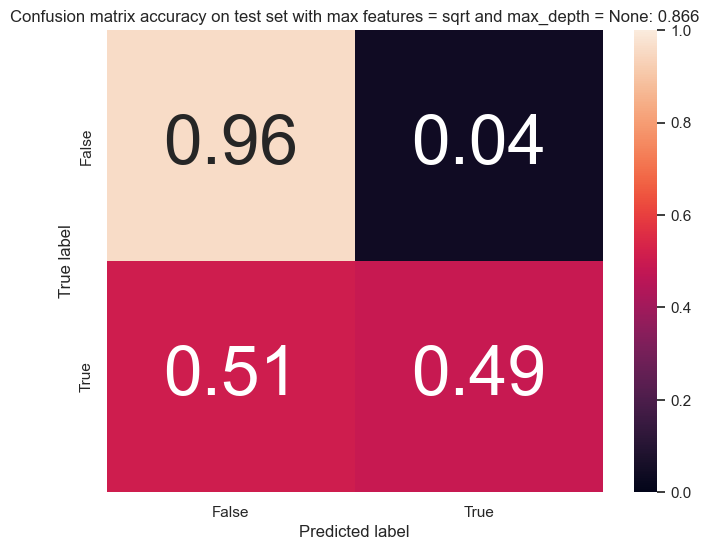

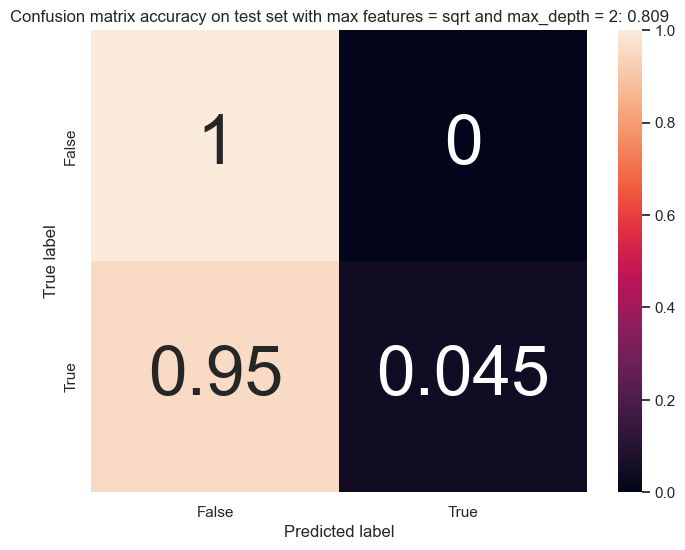

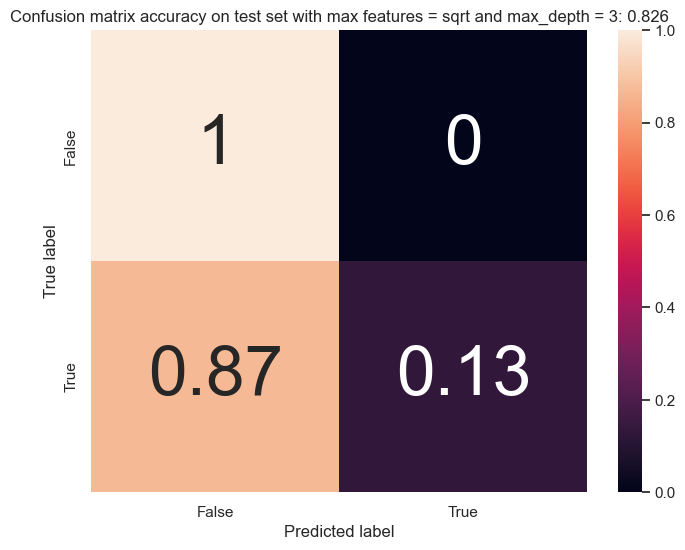

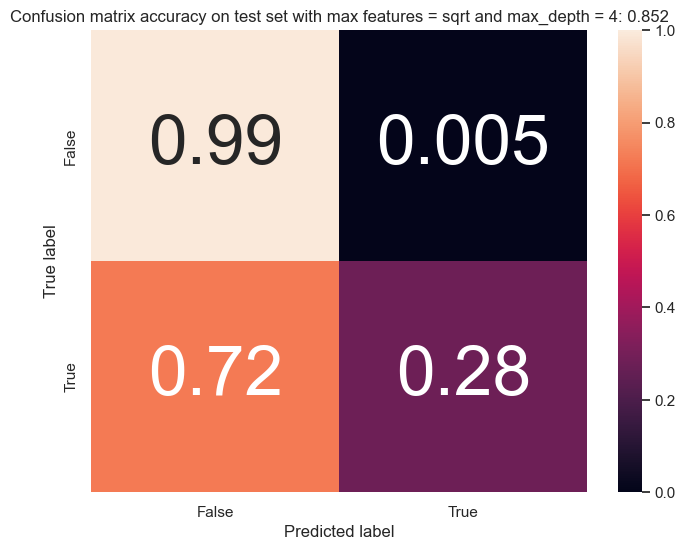

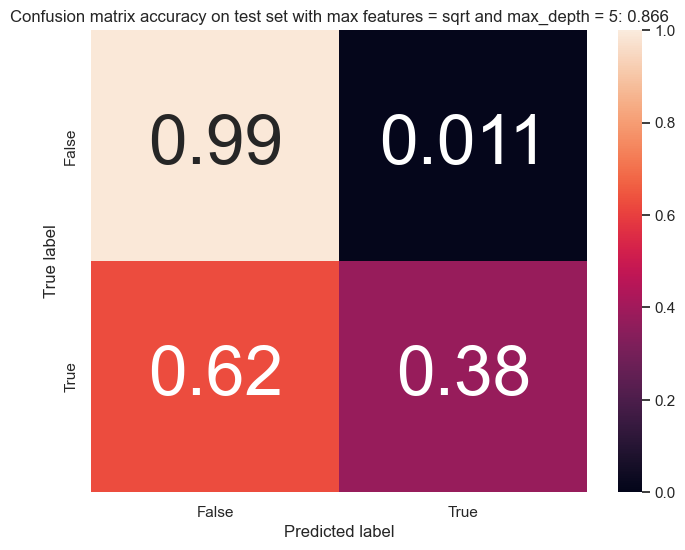

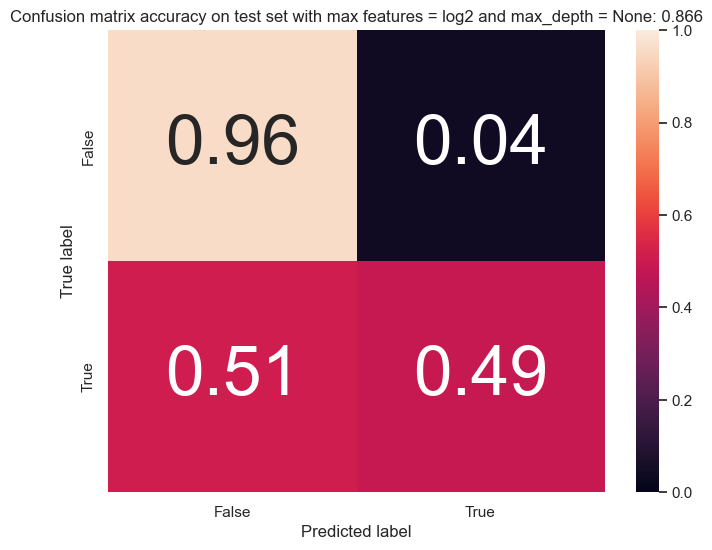

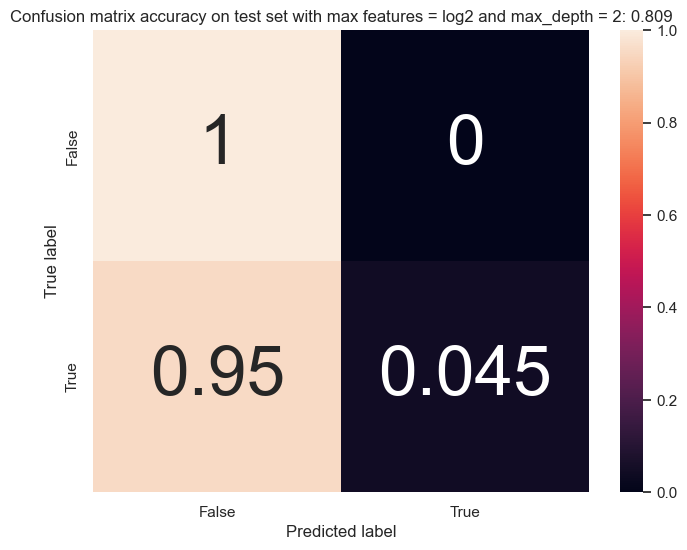

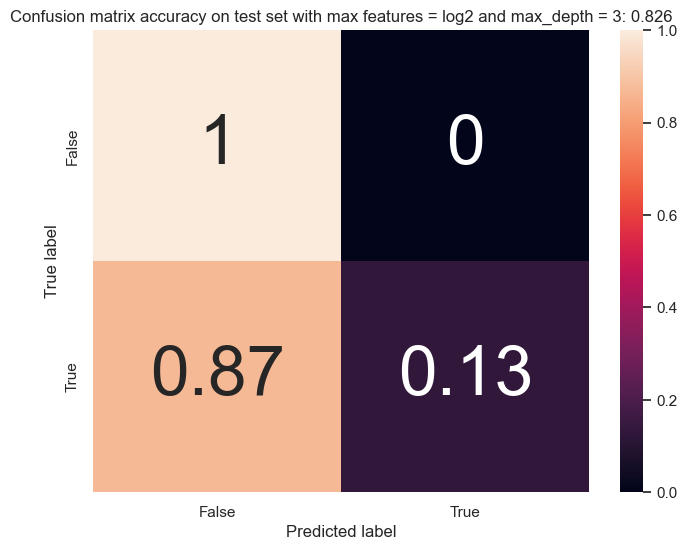

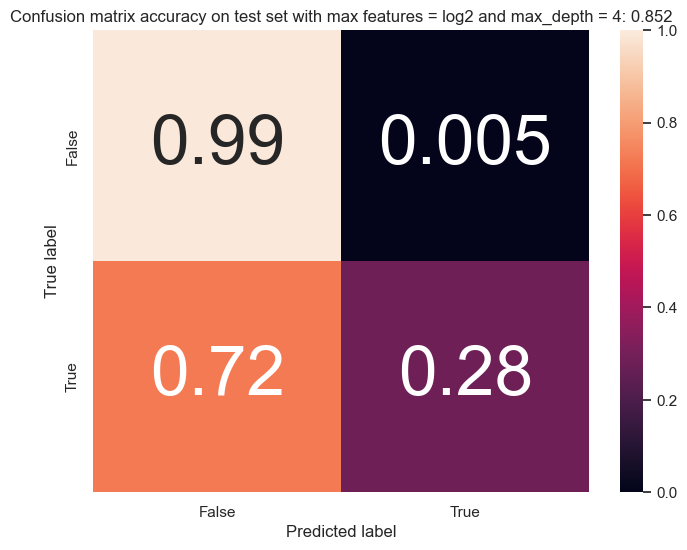

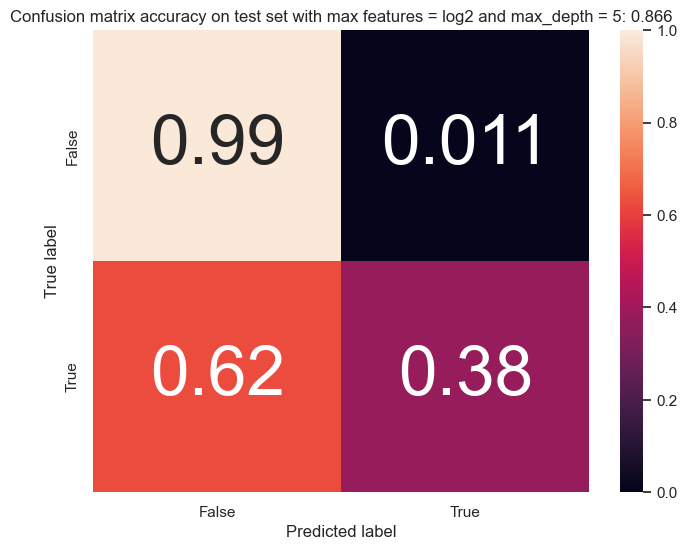

In [52]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [61]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier()

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)

# fitting it
clf.fit(X,Y)

# best parameters
# clf.best_params_


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.868 total time=   0.8s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.870 total time=   0.4s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.863 total time=   0.5s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.866 total time=   0.5s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7;, score=0.862 total time=   0.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=2, min_child_weight=1;, score=0.860 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=2, min_child_weight=1;, score=0.860 total time=   0.2s
[CV 3/5] END colsample_by

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

[22:38:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


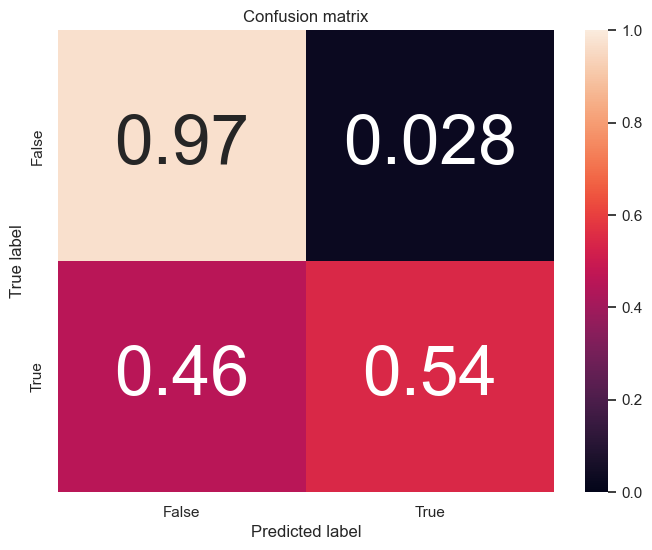

In [67]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=5,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,Y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(Y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)


In [74]:
# 9.1. Loading the new raw

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-84AHDEK\ANUJ;"
                     "Database=dtwhpwerbi ;"
                     "Trusted_Connection=yes;")

# rynning the SQL quey i need
unseen_data = pd.read_sql_query('''SELECT * FROM [dbo].[new unseen data]''', conn2)

#conn.close()

# print the shape
print(unseen_data.shape)

# Viz
unseen_data.head()

(3344, 14)


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.000000,1,True,True,101348.882812,True
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.859375,1,False,True,112542.578125,False
2,3,15619340,AP Onio,502,France,Female,42,8,159660.796875,3,True,False,113931.570312,True
3,4,15701390,AP Boni,699,France,Female,39,1,0.000000,2,False,False,93826.632812,False
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.820312,1,True,True,79084.101562,False


In [76]:
# 9.2. Applying the same pre-processing stages

# Limiting the data
unseen_data2 = unseen_data[['creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary']]

# dummy variables
unseen_data2 = pd.get_dummies(unseen_data2, columns = ['geography', 'gender', 'hascrcard', 'isactivemember'],drop_first=True)

#scaling
scale_vars = ['creditscore','estimatedsalary','balance','age']
unseen_data2[scale_vars] = scaler.fit_transform(unseen_data2[scale_vars])


unseen_data2.head()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,geography_Germany,geography_Spain,gender_Male,hascrcard_True,isactivemember_True
0,0.538,0.342857,2,0.000000,1,0.507077,0,0,0,1,1
1,0.516,0.328571,1,0.334031,1,0.563089,0,1,0,0,1
2,0.304,0.342857,8,0.636357,3,0.570039,0,0,0,1,0
3,0.698,0.300000,1,0.000000,2,0.469437,0,0,0,0,0
4,1.000,0.357143,2,0.500246,1,0.395667,0,1,0,1,1


In [77]:
# 9.3. Making predictions

pred_xgboost = final_model.predict(unseen_data2.values)
pred_prob_xgboost = final_model.predict_proba(unseen_data2.values)

pred_xgboost

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
pred_prob_xgboost

array([[0.655799, 0.344201],
       [0.777718, 0.222282],
       [0.034237, 0.965763],
       ...,
       [0.877938, 0.122062],
       [0.826632, 0.173368],
       [0.909140, 0.090860]], dtype=float32)

In [79]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost, 1)

[0.34420097,
 0.2222817,
 0.96576256,
 0.047724795,
 0.08831075,
 0.16223046,
 0.053032983,
 0.9828955,
 0.079465576,
 0.02900302,
 0.016715806,
 0.01756141,
 0.06826019,
 0.021663137,
 0.027522657,
 0.25678968,
 0.9704343,
 0.025236882,
 0.56268036,
 0.015739053,
 0.027120367,
 0.042268932,
 0.38733032,
 0.055530664,
 0.2602059,
 0.0049035186,
 0.22189659,
 0.07711209,
 0.33411688,
 0.09364493,
 0.8394489,
 0.07416196,
 0.22866286,
 0.08147305,
 0.026256844,
 0.6724838,
 0.039872013,
 0.026455764,
 0.09958479,
 0.05636781,
 0.22426727,
 0.82600814,
 0.26459733,
 0.7769782,
 0.21758449,
 0.09096591,
 0.29719475,
 0.35600978,
 0.24828637,
 0.060259566,
 0.14710326,
 0.055958107,
 0.032938402,
 0.5259169,
 0.7042533,
 0.17214523,
 0.41915593,
 0.074490644,
 0.7024225,
 0.5389207,
 0.3179745,
 0.07782315,
 0.070479885,
 0.10187087,
 0.12668175,
 0.07577393,
 0.33380893,
 0.055725493,
 0.061163083,
 0.058711383,
 0.9986526,
 0.1648764,
 0.096419685,
 0.04348401,
 0.0125483405,
 0.05934854,

In [80]:
# 9.4. Joining the raw data witht the predictions

output = unseen_data.copy()
output['Predictions - Churn or Not'] = pred_xgboost
output['Predictions - Probability to Churn'] = column(pred_prob_xgboost, 1)
output['Predictions - Churn or Not Desc'] = 'Empty'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 0] = 'Retention'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 1] = 'Churn'
output.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.000000,1,True,True,101348.882812,True,0,0.344201,Retention
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.859375,1,False,True,112542.578125,False,0,0.222282,Retention
2,3,15619340,AP Onio,502,France,Female,42,8,159660.796875,3,True,False,113931.570312,True,1,0.965763,Churn
3,4,15701390,AP Boni,699,France,Female,39,1,0.000000,2,False,False,93826.632812,False,0,0.047725,Retention
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.820312,1,True,True,79084.101562,False,0,0.088311,Retention


In [82]:
# 9.5. Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib

quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-84AHDEK\ANUJ;"
                     "Database=dtwhpwerbi ;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

output.to_sql('Churn Predictions Output', schema='dbo', con = engine, if_exists = 'replace')

-1